In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

xtrain_all, xtest, ytrain_all, ytest = train_test_split(
    housing.data, housing.target, random_state=7)
xtrain, xvalid, ytrain, yvalid = train_test_split(
    xtrain_all ,ytrain_all, random_state=11)
print(xtrain.shape, ytrain.shape)
print(xvalid.shape, yvalid.shape)
print(xtest.shape, ytest.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xvalid_scaled= scaler.transform(xvalid)
xtest_scaled = scaler.transform(xtest)

In [9]:
# 注：无法使用 sequential 的方式来实现模型
# 使用函数式 API
input = keras.layers.Input(shape=xtrain.shape[1:])  # input is 8
hidden1 = keras.layers.Dense(30, activation='relu')(input)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1) # 为符合函数
# 合并 input 和 hidden2
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
# 用 model 把其固化下来
model = keras.models.Model(inputs=[input], outputs=[output])

model.summary()
model.compile(loss="mean_squared_error", 
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-5)]

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           930         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_7[0][0]         

In [10]:
history = model.fit(xtrain_scaled, ytrain, 
                    validation_data=(xvalid_scaled, yvalid),
                    epochs=100, callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 867us/step - loss: 1.6673 - val_loss: 0.9091
Epoch 2/100
363/363 [==============================] - 0s 689us/step - loss: 0.7863 - val_loss: 0.8170
Epoch 3/100
363/363 [==============================] - 0s 702us/step - loss: 0.7139 - val_loss: 0.7564
Epoch 4/100
363/363 [==============================] - 0s 685us/step - loss: 0.6642 - val_loss: 0.7068
Epoch 5/100
363/363 [==============================] - 0s 683us/step - loss: 0.6274 - val_loss: 0.6709
Epoch 6/100
363/363 [==============================] - 0s 700us/step - loss: 0.5972 - val_loss: 0.6516
Epoch 7/100
363/363 [==============================] - 0s 682us/step - loss: 0.5757 - val_loss: 0.6219
Epoch 8/100
363/363 [==============================] - 0s 664us/step - loss: 0.5573 - val_loss: 0.6009
Epoch 9/100
363/363 [==============================] - 0s 674us/step - loss: 0.5429 - val_loss: 0.5860
Epoch 10/100
363/363 [==============================] - 0s 672us/step - l

363/363 [==============================] - 0s 860us/step - loss: 0.3629 - val_loss: 0.3846
Epoch 78/100
363/363 [==============================] - 0s 815us/step - loss: 0.3610 - val_loss: 0.3865
Epoch 79/100
363/363 [==============================] - 0s 813us/step - loss: 0.3605 - val_loss: 0.3828
Epoch 80/100
363/363 [==============================] - 0s 934us/step - loss: 0.3601 - val_loss: 0.3818
Epoch 81/100
363/363 [==============================] - 0s 829us/step - loss: 0.3591 - val_loss: 0.3812
Epoch 82/100
363/363 [==============================] - 0s 856us/step - loss: 0.3585 - val_loss: 0.3801
Epoch 83/100
363/363 [==============================] - 0s 967us/step - loss: 0.3572 - val_loss: 0.3803
Epoch 84/100
363/363 [==============================] - 0s 846us/step - loss: 0.3566 - val_loss: 0.3790
Epoch 85/100
363/363 [==============================] - 0s 854us/step - loss: 0.3560 - val_loss: 0.3790
Epoch 86/100
363/363 [==============================] - 0s 815us/step - loss:

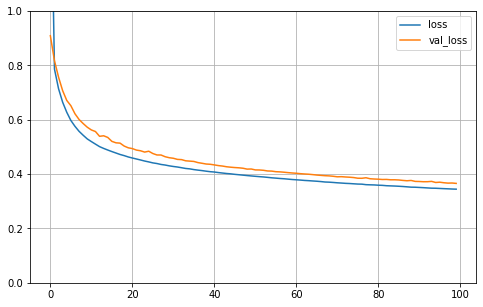

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

In [12]:
model.evaluate(xtest_scaled, ytest, verbose=0)

0.3655466139316559